<a href="https://colab.research.google.com/github/aptr288/ML_POC_Projects/blob/master/Enigne_Sound_Classification_Latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Engine Sound Classification 

In [1]:
#importing required libraries  
import glob
import os
import librosa
import librosa.display
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.metrics import precision_recall_fscore_support
from numpy import array, argmax
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU, PReLU
from sklearn.model_selection import RandomizedSearchCV
from scipy.io import wavfile
from scipy.signal import spectrogram
from keras.models import load_model, Sequential
from google.colab import drive
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
#loading data from google drive
os.getcwd()
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/Violation_Prediction/")
os.listdir()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


['violation_data.csv', 'violation_data.txt', 'Violation_prediction_v1.ipynb']

# Data Visulaization

In [3]:
dataset = [{'path': path, 'label': path.split('/' )[6] } for path in glob.glob("/content/drive/My Drive/Colab Notebooks/Engine_Sound_Classification/**/*.wav")]
df = pd.DataFrame.from_dict(dataset)

# Add a column to store the data read from each wavfile...   
df['x'] = df['path'].apply(lambda x: wavfile.read(x)[1])
df.head(5)

,path,label,x
0,/content/drive/My Drive/Colab Notebooks/Engine...,Camry_Idle,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0..."
1,/content/drive/My Drive/Colab Notebooks/Engine...,Camry_Acc,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0..."
2,/content/drive/My Drive/Colab Notebooks/Engine...,Camry_Acc,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0..."
3,/content/drive/My Drive/Colab Notebooks/Engine...,Camry_Dec,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0..."
4,/content/drive/My Drive/Colab Notebooks/Engine...,Camry_Dec,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0..."


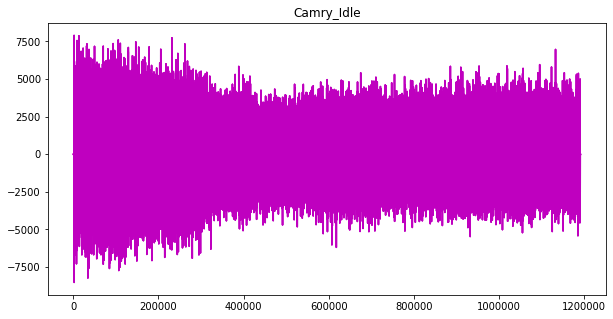

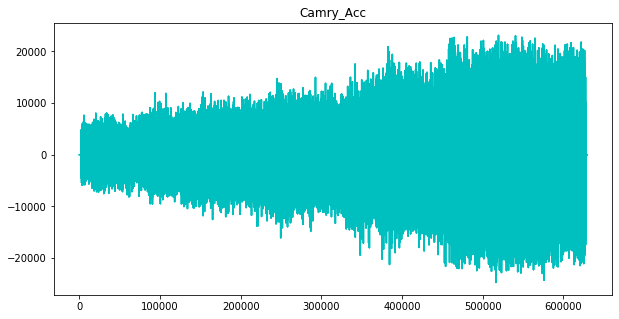

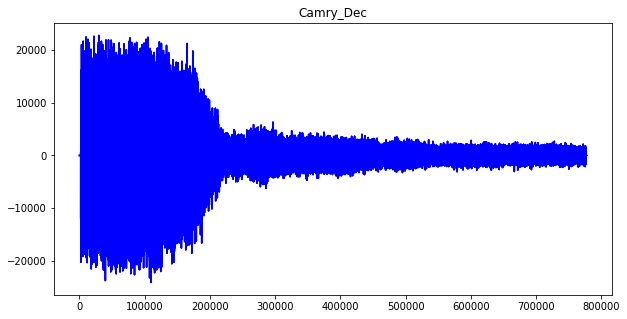

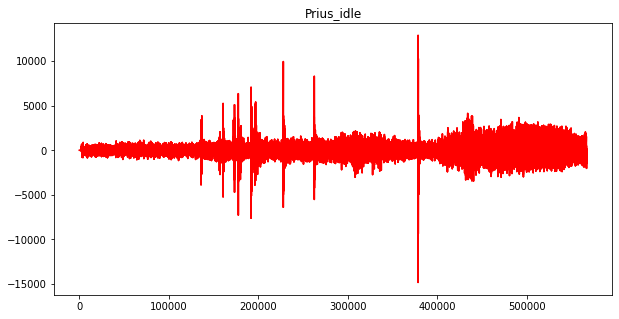

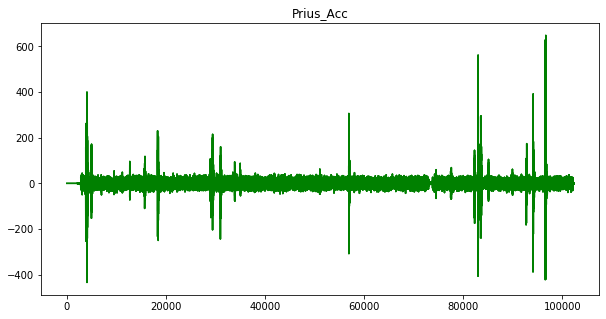

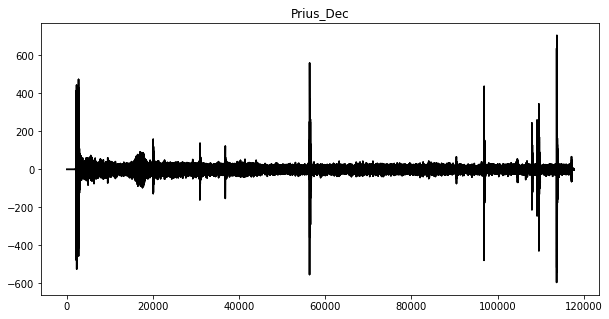

In [4]:
#Choosing one of the each samples form each catogery 
Camry_Idle = df[df['label'] == 'Camry_Idle' ].sample(1)
Camry_Acc = df[df['label'] == 'Camry_Acc' ].sample(1)
Camry_Dec = df[df['label'] == 'Camry_Dec' ].sample(1)
Prius_idle = df[df['label'] == 'Prius_idle' ].sample(1)
Prius_Acc = df[df['label'] == 'Prius_Acc' ].sample(1)
Prius_Dec = df[df['label'] == 'Prius_Dec' ].sample(1)

# Plot the  samples onto six different figures
plt.figure(1, figsize=(10,5))
plt.title('Camry_Idle')
plt.plot(Camry_Idle['x'].values[0], c='m')

plt.figure(2, figsize=(10, 5))
plt.title('Camry_Acc')
plt.plot(Camry_Acc['x'].values[0], c='c')

plt.figure(3, figsize=(10, 5))
plt.title('Camry_Dec')
plt.plot(Camry_Dec['x'].values[0], c='b')

plt.figure(4, figsize=(10,5))
plt.title('Prius_idle')
plt.plot(Prius_idle['x'].values[0], c='r')

plt.figure(5, figsize=(10, 5))
plt.title('Prius_Acc')
plt.plot(Prius_Acc['x'].values[0], c='g')

plt.figure(6, figsize=(10, 5))
plt.title('Prius_Dec')
plt.plot(Prius_Dec['x'].values[0], c='k')

Text(0.5, 1.0, 'Camry Engine sound waveforms overlayed onto one another')

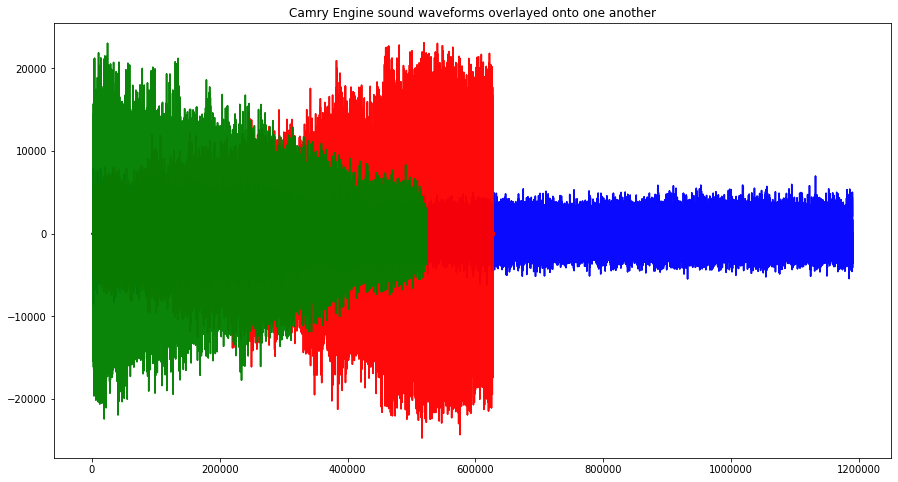

In [5]:
Camry_Idle = df[df['label'] == 'Camry_Idle' ].sample(1)
Camry_Acc = df[df['label'] == 'Camry_Acc' ].sample(1)
Camry_Dec = df[df['label'] == 'Camry_Dec' ].sample(1)

plt.figure(7, figsize=(15,8))
plt.plot(Camry_Idle['x'].values[0], c='b', label='Camry_Idle', alpha=0.8)
plt.plot(Camry_Acc['x'].values[0], c='r', label='Camry_Acc', alpha=0.8)
plt.plot(Camry_Dec['x'].values[0], c='g', label='Camry_Dec', alpha=0.8)

plt.title('Camry Engine sound waveforms overlayed onto one another')

Text(0.5, 1.0, 'Prius Engine sound waveforms overlayed onto one another')

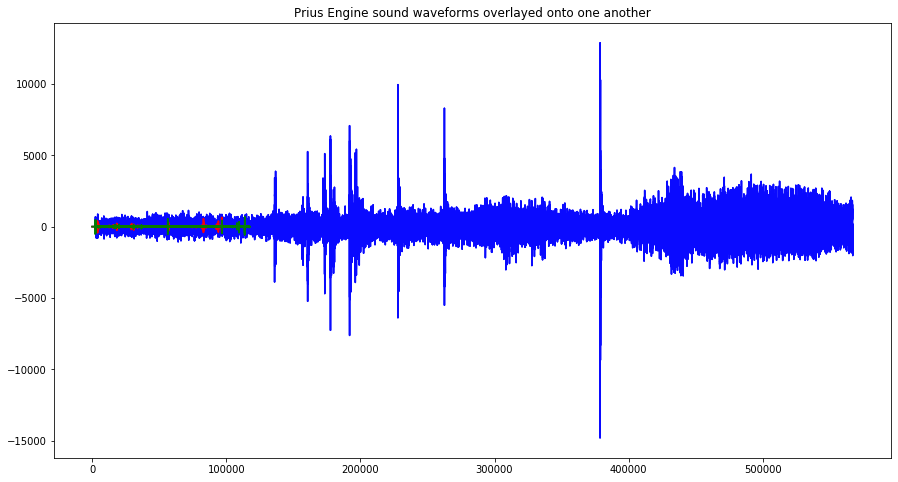

In [6]:
Prius_idle = df[df['label'] == 'Prius_idle' ].sample(1)
Prius_Acc = df[df['label'] == 'Prius_Acc' ].sample(1)
Prius_Dec = df[df['label'] == 'Prius_Dec' ].sample(1)

plt.figure(8, figsize=(15,8))
plt.plot(Prius_idle['x'].values[0], c='b', label='Prius_idle', alpha=0.8)
plt.plot(Prius_Acc['x'].values[0], c='r', label='Prius_Acc', alpha=0.8)
plt.plot(Prius_Dec['x'].values[0], c='g', label='Prius_Dec', alpha=0.8)

plt.title('Prius Engine sound waveforms overlayed onto one another')

# Extracting features from audio files

The parse audio funtion takes all the files divided into subfolders with their class label names and extract features does extract meaningful features from each audio file.

In [0]:
#https://librosa.github.io/librosa/feature.html
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

def parse_audio_files(parent_dir,sub_dirs,file_ext='*.wav'):
    features, labels = np.empty((0,193)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
            #Stack arrays in sequence horizontally (column wise).
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            #Stack arrays in sequence vertically (row wise). So each audio files features are saved in new rows
            features = np.vstack([features,ext_features]) 
            labels = np.append(labels, fn.split('/')[6])
    return np.array(features), np.array(labels)

In [0]:
parent_dir = '/content/drive/My Drive/Colab Notebooks/Engine_Sound_Classification'
sub_dirs = ['Camry_Acc','Camry_Idle',"Prius_Acc", "Prius_idle", "Camry_Dec", "Prius_Dec" ]
features, labels = parse_audio_files(parent_dir,sub_dirs)


Saved the features in NP array so as reuse and avoid repeated time consuming feature extraction

In [0]:
np.save("Engine_Features" + '.npy', features)
np.save("Engine_Labels" + '.npy', labels)

In [10]:

features = np.load("Engine_Features"+ '.npy')
labels = np.load("Engine_Labels" + '.npy')
print("========================The extracted features================")
print(features)

print("==============================================================")
print("=====The labels of classification in categorical variable======")
print(labels)

print("===================Labels converted to binary ==============================")
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
print(integer_encoded)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
labels = onehot_encoder.fit_transform(integer_encoded)

print("=====Then to one hot encoding as ML algorithms cannot work with categorical data directly=====")

print(labels)

#train_test_split = np.random.rand(len(features)) < 0.70
#train and test on same dataset
train_test_split = np.random.rand(len(features)) < 1
train_x = features[train_test_split]
train_y = labels[train_test_split]
print(train_test_split)
test_x = features[train_test_split]
test_y = labels[train_test_split]
print("===================Input shape ==============================")

print(features.shape)
print(labels.shape)

========================The extracted features================
[[-2.07379308e+01  7.44144096e+01 -4.49525296e+01 ...  5.71265886e-02
   5.30495924e-03  8.38223309e-03]
 [-2.09186621e+00  7.14839062e+01 -4.60886464e+01 ...  8.30651309e-02
   3.06165970e-03 -8.17481865e-03]
 [-1.20465548e+02  7.25199590e+01 -3.28280048e+01 ... -6.38481769e-02
  -1.15051626e-02  2.04553823e-02]
 ...
 [-3.36123771e+01  7.26238512e+01 -4.20459136e+01 ... -2.90136486e-03
  -3.47914816e-03 -1.47358090e-02]
 [-1.19637248e+02  7.93134318e+01 -4.10466011e+01 ...  7.77337435e-03
  -1.55739618e-03  4.33026638e-03]
 [-6.84348772e+02  1.76968911e+02 -7.38857875e+01 ...  2.10276270e-02
  -7.61279652e-04  3.41617056e-03]]
=====The labels of classification in categorical variable======
['Camry_Acc' 'Camry_Acc' 'Camry_Idle' 'Prius_Acc' 'Prius_idle' 'Camry_Dec'
 'Camry_Dec' 'Prius_Dec']
===================Labels converted to binary ==============================
[0 0 2 3 5 1 1 4]
=====Then to one hot encoding as ML algor

# Trainig the NN model over audio files


In [11]:
def assure_path_exists(path):
    mydir = os.path.join(os.getcwd(), path)
    if not os.path.exists(mydir):
        os.makedirs(mydir)

# neural network dimensions
n_dim = train_x.shape[1]
n_classes = train_y.shape[1]
n_hidden_units_1 = n_dim
n_hidden_units_2 = 400 # approx n_dim * 2
n_hidden_units_3 = 600
n_hidden_units_4 = 400 #
n_hidden_units_5 = 200 # half of layer 2

checkpoint_dir = "model"
assure_path_exists(checkpoint_dir)

print ("Features:", n_dim, "Classes:", n_classes)

Features: 193 Classes: 6


In [12]:
tf.set_random_seed(0)
np.random.seed(0)

def create_model(activation_function='relu', init_type='normal', optimiser='RMSprop', dropout_rate=0.5):
    model = Sequential()
    # layer 1
    model.add(Dense(n_hidden_units_1, input_dim=n_dim, init=init_type, activation='relu'))
    #creating simple model
    # layer 2
    # model.add(Dense(n_hidden_units_2, init=init_type, activation='sigmoid'))
    # model.add(Dropout(dropout_rate))
    # # layer 3
    # model.add(Dense(n_hidden_units_3, init=init_type, activation='tanh'))
    # model.add(Dropout(dropout_rate))
     # layer 4
    model.add(Dense(n_hidden_units_4, init=init_type, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    # output layer
    model.add(Dense(n_classes, init=init_type, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=optimiser, metrics=['accuracy'])
    return model

# a stopping function to stop training before we excessively overfit to the training set
earlystop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')

model = create_model()

history = model.fit(train_x, train_y,  nb_epoch=50, batch_size=10, validation_data=(test_x, test_y))
model.save('model.h5')  # creates a HDF5 file 'model.h5'
# del model  # deletes the existing model





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(193, input_dim=193, activation="relu", kernel_initializer="normal")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, activation="relu", kernel_initializer="normal")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="softmax", kernel_initializer="normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 8 samples, validate on 8 samples
Epoch 1/50





8/8 [==============================] - 1s 73ms/step - loss: 8.9552 - acc: 0.0000e+00 - val_loss: 4.8286 - val_acc: 0.3750
Epoch 2/50
8/8 [==============================] - 0s 617us/step - loss: 5.7794 - acc: 0.2500 - val_loss: 5.0296 - val_acc: 0.6250
Epoch 3/50
8/8 [==============================] - 0s 780us/step - loss: 5.6046 - acc: 0.5000 - val_loss: 6.7426 - val_acc: 0.3750
Epoch 4/50
8/8 [==============================] - 0s 796us/step - loss: 5.9879 - acc: 0.3750 - val_loss: 6.2798 - val_acc: 0.3750
Epoch 5/50
8/8 [==============================] - 0s 804us/step - loss: 6.6170 - acc: 0.2500 - val_loss: 4.7092 - val_acc: 0.3750
Epoch 6/50
8/8 [==============================] - 0s 782us/step - loss: 5.1954 - acc: 0.5000 - val_loss: 3.4574 - val_acc: 0.6250
Epoch 7/50
8/8 [==============================] - 0s 918us/step - loss: 2

# Accuracy 

In [13]:
model = load_model('model.h5')
# obtain the prediction probabilities
y_prob = model.predict_proba(test_x, verbose=0)
#y_pred = np_utils.probas_to_classes(y_prob)
#replaced above probas_to_classes as updated keras doesnt have it  
print(y_prob[0:3])
y_pred = y_prob.argmax(axis=-1)
y_prob_yes = [prob_of_element[0] for prob_of_element in y_prob] 
y_prob_no = [prob_of_element[1] for prob_of_element in y_prob]
print("Probability of yes ", y_prob_yes) 
print("Probability of no ", y_prob_no)
print(y_pred[0:2])
print(test_y)
y_true = np.argmax(test_y, 1)
print(y_true[0:2])

#roc = metrics.roc_auc_score(test_y, y_prob)
#print ("ROC:",  round(roc,2))

# evaluate the model
#score, accuracy = model.evaluate(test_x, test_y, batch_size=32)
#print("\nAccuracy = {:.2f}".format(accuracy))

p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print ("F-Score:", round(f,3))

[[4.7123656e-01 5.2875841e-01 7.4196453e-07 2.1922149e-08 8.5564915e-09
  4.2379711e-06]
 [9.9999964e-01 3.7310738e-07 8.1202514e-13 4.7314600e-14 3.1531020e-13
  7.6332083e-12]
 [4.9744592e-10 2.5244197e-04 9.9970752e-01 1.0960596e-08 4.5698232e-09
  4.0035629e-05]]
Probability of yes  [0.47123656, 0.99999964, 4.974459e-10, 0.0, 1.868115e-15, 4.8334045e-06, 1.12182946e-07, 0.0]
Probability of no  [0.5287584, 3.7310738e-07, 0.00025244197, 7.007555e-27, 1.0965545e-06, 0.9999926, 0.9998597, 8.0825864e-27]
[1 0]
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
[0 0]
F-Score: 0.75


In [14]:
a = [[1,2]]
print(str(a))

[[1, 2]]


# Generating Predictions

Once we've trained a model, we can use the following process to pass an audio file into our model and generate predictions.

In [0]:
def extract_features_only(filename):
    features = np.empty((0,193))
    X, sample_rate = librosa.load(filename)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
    features = np.vstack([features,ext_features])
    return features

In [16]:
for path in glob.glob("/content/drive/My Drive/Colab Notebooks/Engine_Sound_Classification/**/*.wav"):
  print("Original label ===>",path.split('/')[6])
  predict_x = extract_features_only(path) 
#predict_x = extract_features_only('/content/drive/My Drive/Colab Notebooks/Engine_Sound_Classification/Prius_Dec/Prius_2014_Power_Mode_Decelerating_Engine_Sound.wav')
  predictions = model.predict(predict_x)
  predicted_label = label_encoder.inverse_transform([np.argmax(predictions)])
  print("Predicted label ===>", predicted_label[-1])
  print("-------------------------------")

Original label ===> Camry_Idle
Predicted label ===> Camry_Idle
-------------------------------
Original label ===> Camry_Acc
Predicted label ===> Camry_Dec
-------------------------------
Original label ===> Camry_Acc
Predicted label ===> Camry_Acc
-------------------------------
Original label ===> Camry_Dec
Predicted label ===> Camry_Dec
-------------------------------
Original label ===> Camry_Dec
Predicted label ===> Camry_Dec
-------------------------------
Original label ===> Prius_idle
Predicted label ===> Prius_idle
-------------------------------
Original label ===> Prius_Acc
Predicted label ===> Prius_Dec
-------------------------------
Original label ===> Prius_Dec
Predicted label ===> Prius_Dec
-------------------------------


In [17]:
#Testing the unlabeled data
for path in glob.glob("/content/drive/My Drive/Colab Notebooks/Engine_Sound_Classification/*.wav"):
  print("Original label ===>",path.split('/')[6])
  predict_x = extract_features_only(path) 
#predict_x = extract_features_only('/content/drive/My Drive/Colab Notebooks/Engine_Sound_Classification/Prius_Dec/Prius_2014_Power_Mode_Decelerating_Engine_Sound.wav')
  predictions = model.predict(predict_x)
  predicted_label = label_encoder.inverse_transform([np.argmax(predictions)])
  print("Predicted label ===>", predicted_label[-1])
  print("-------------------------------")

Original label ===> New_Recording_2.wav
Predicted label ===> Prius_idle
-------------------------------
Original label ===> New_Recording_3.wav
Predicted label ===> Prius_idle
-------------------------------
Original label ===> New_Recording_4.wav
Predicted label ===> Prius_idle
-------------------------------
Original label ===> New_Recording_6.wav
Predicted label ===> Prius_idle
-------------------------------
Original label ===> New_Recording_7.wav
Predicted label ===> Prius_idle
-------------------------------
Original label ===> New_Recording_8.wav
Predicted label ===> Prius_idle
-------------------------------


In [18]:
dataset = [{'path': path, 'label': path.split('/' )[6] } for path in glob.glob("/content/drive/My Drive/Colab Notebooks/Engine_Sound_Classification/*.wav")]
test_df = pd.DataFrame.from_dict(dataset)

# Add a column to store the data read from each wavfile...   
test_df['x'] = test_df['path'].apply(lambda x: wavfile.read(x)[1])
test_df.head(10)

,path,label,x
0,/content/drive/My Drive/Colab Notebooks/Engine...,New_Recording_2.wav,"[[1, 1], [0, 0], [1, 1], [2, 2], [2, 2], [2, 2..."
1,/content/drive/My Drive/Colab Notebooks/Engine...,New_Recording_3.wav,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1..."
2,/content/drive/My Drive/Colab Notebooks/Engine...,New_Recording_4.wav,"[[-3, -3], [-3, -3], [-3, -3], [-2, -2], [-1, ..."
3,/content/drive/My Drive/Colab Notebooks/Engine...,New_Recording_6.wav,"[[-2, -2], [-1, -1], [0, 0], [2, 2], [1, 1], [..."
4,/content/drive/My Drive/Colab Notebooks/Engine...,New_Recording_7.wav,"[[1, 1], [1, 1], [1, 1], [1, 1], [-2, -2], [-5..."
5,/content/drive/My Drive/Colab Notebooks/Engine...,New_Recording_8.wav,"[[-2, -2], [-4, -4], [-4, -4], [-2, -2], [0, 0..."


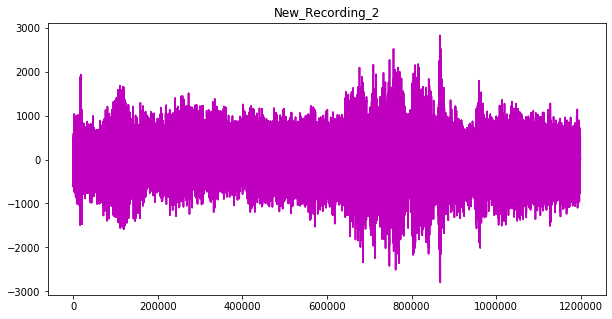

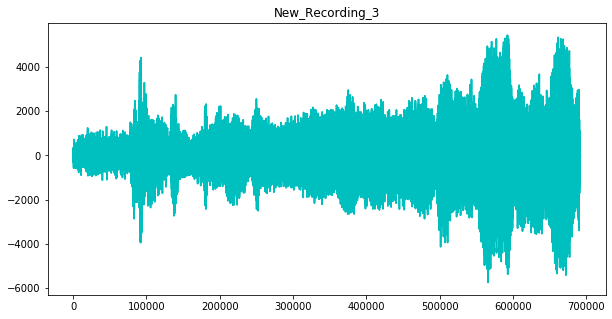

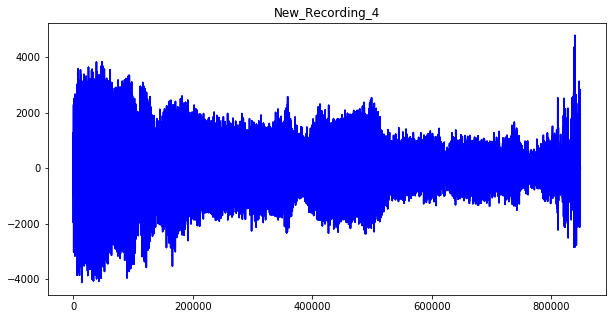

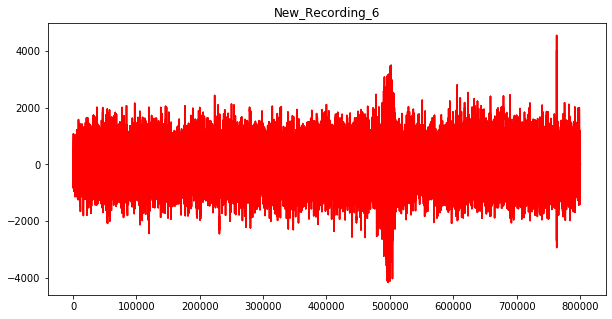

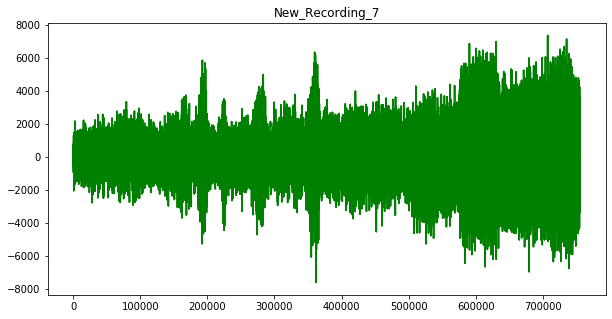

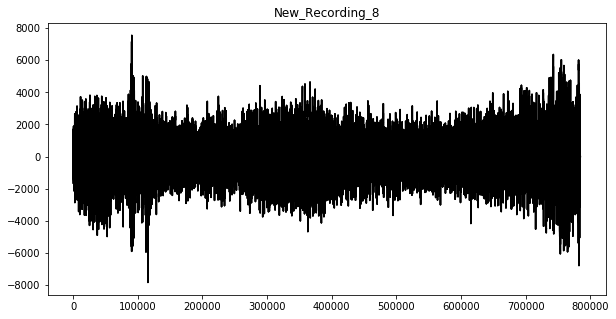

In [19]:
#Choosing one of the each samples form each catogery 
New_Recording_2 = test_df[test_df['label'] == 'New_Recording_2.wav' ].sample(1)
New_Recording_3 = test_df[test_df['label'] == 'New_Recording_3.wav' ].sample(1)
New_Recording_4 = test_df[test_df['label'] == 'New_Recording_4.wav' ].sample(1)
New_Recording_6 = test_df[test_df['label'] == 'New_Recording_6.wav' ].sample(1)
New_Recording_7 = test_df[test_df['label'] == 'New_Recording_7.wav' ].sample(1)
New_Recording_8 = test_df[test_df['label'] == 'New_Recording_8.wav' ].sample(1)

# Plot the three samples onto three different figures
plt.figure(1, figsize=(10,5))
plt.title('New_Recording_2')
plt.plot(New_Recording_2['x'].values[0], c='m')

plt.figure(2, figsize=(10, 5))
plt.title('New_Recording_3')
plt.plot(New_Recording_3['x'].values[0], c='c')

plt.figure(3, figsize=(10, 5))
plt.title('New_Recording_4')
plt.plot(New_Recording_4['x'].values[0], c='b')

plt.figure(4, figsize=(10,5))
plt.title('New_Recording_6')
plt.plot(New_Recording_6['x'].values[0], c='r')

plt.figure(5, figsize=(10, 5))
plt.title('New_Recording_7')
plt.plot(New_Recording_7['x'].values[0], c='g')

plt.figure(6, figsize=(10, 5))
plt.title('New_Recording_8')
plt.plot(New_Recording_8['x'].values[0], c='k')